<a href="https://colab.research.google.com/github/FulISun/Computer_Vision/blob/main/CNN/01_NN_MNIST_example_onehot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Example

## [1] MNIST Data 생성 및 확인

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, t_train), (X_test, t_test) = mnist.load_data()

print()
print('X_train.shape = ', X_train.shape, ', t_train.shape = ', t_train.shape) # (batch_size, W, H) = 데이터 수, width, height, (channel). 흑백 사진이라 채널 1이라서 생략
print('X_test.shape = ', X_test.shape, ', t_test.shape = ', t_test.shape)

# (batch_size, W, H, channel) <= 이미지는 4차원으로 표현됨


X_train.shape =  (60000, 28, 28) , t_train.shape =  (60000,)
X_test.shape =  (10000, 28, 28) , t_test.shape =  (10000,)


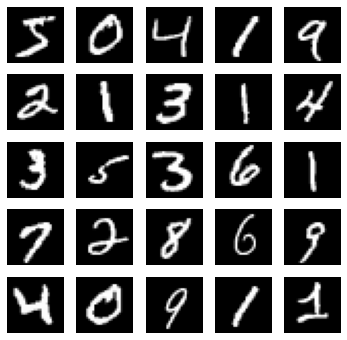

In [ ]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력

plt.figure(figsize = (6, 6))

for index in range(25): # 25개 출력

    plt.subplot(5, 5, index + 1) # 5행 5열
    plt.imshow(X_train[index], cmap = 'gray')
    plt.axis('off')

plt.show()

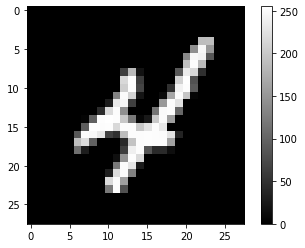

In [ ]:
plt.imshow(X_train[9], cmap = 'gray')
plt.colorbar()
plt.show()

## [2] 데이터 전처리

In [ ]:
print(X_train.max(), ',', X_train.min())

255 , 0


이미지는 항상 0~255로 표현됨. 0에 가까울수록 검은색, 255에 가까울수록 흰색

In [ ]:
# X_train, X_test 값 범위를 0~1 사이로 정규화

# 일반적으로 이미지는 정규화를 해야 fitting이 잘 된다고 알려져 있음!! 
X_train = X_train / 255.0
X_test = X_test / 255.0

# 정규화 결과 확인
print('train max = ', X_train[0].max(), ',train min = ', X_train[0].min())
print('test max = ', X_test[0].max(), ',test min = ', X_test[0].min())

train max =  1.0 ,train min =  0.0
test max =  1.0 ,test min =  0.0


In [ ]:
# 정답 데이터 One-Hot Encoding

t_train = to_categorical(t_train, 10)
t_test = to_categorical(t_test, 10)

# One-Hot Encoding 확인
print('train label = ', t_train[0], ', decimal value = ', np.argmax(t_train[0]))
print('test label = ', t_test[0], ', decival value = ', np.argmax(t_test[0]))

train label =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] , decimal value =  5
test label =  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] , decival value =  7


## [3] 모델 구축 및 컴파일 

In [ ]:
model = Sequential() # model 생성 

model.add(Flatten(input_shape = (28, 28, 1))) # 신경망은 데이터가 1차원 벡터로 들어와야 해서 Flatten. 784 각각이 feature라고 생각하면 됨

model.add(Dense(100, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

In [ ]:
784*100+100

78500

In [ ]:
100*10+10

1010

In [ ]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer = SGD(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## [4] 모델 학습

In [ ]:
hist = model.fit(X_train, t_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7441 - accuracy: 0.8101 - val_loss: 0.3868 - val_accuracy: 0.8964
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3674 - accuracy: 0.8979 - val_loss: 0.3149 - val_accuracy: 0.9125
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3132 - accuracy: 0.9131 - val_loss: 0.2815 - val_accuracy: 0.9217
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2821 - accuracy: 0.9202 - val_loss: 0.2583 - val_accuracy: 0.9283
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2593 - accuracy: 0.9273 - val_loss: 0.2428 - val_accuracy: 0.9321
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2411 - accuracy: 0.9323 - val_loss: 0.2293 - val_accuracy: 0.9361
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2261 - accuracy: 0.9360 - val_loss: 0.2175 - val_accuracy:

## [5] 모델 정확도 평가

In [ ]:
model.evaluate(X_test, t_test)

# 학습시킨 모델의 정확도 평가는 evaluate, 특정 값 예측은 predict

313/313 [==============================] - 1s 3ms/step - loss: 0.1092 - accuracy: 0.9693


[0.1092216819524765, 0.9692999720573425]

## [6] 손실 및 정확도 추세

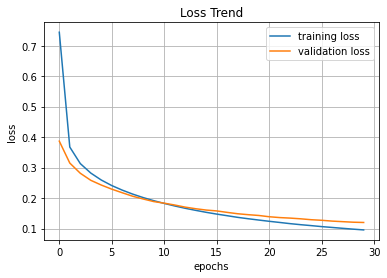

In [ ]:
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label = 'training loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')
plt.legend(loc = 'best')

plt.show()

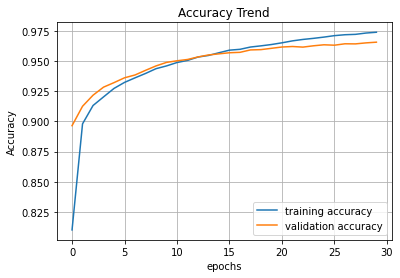

In [ ]:
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label = 'training accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')
plt.legend(loc = 'best')

plt.show()

# epoch 13쯤 지나면 overfitting 발생

## [7] 예측

In [ ]:
pred = model.predict(X_test)

print(pred.shape)

print(pred[:5]) # 모델이 예측한 pred[:5] 필기체 손글씨 숫자와 정답 비교

print()
print(np.argmax(pred[:5], axis = 1))

(10000, 10)
[[1.6670578e-05 1.6544018e-07 5.5318844e-04 1.1588373e-03 1.0018242e-08
  3.2627195e-06 4.8936866e-10 9.9824226e-01 6.0869183e-06 1.9525378e-05]
 [6.4612097e-05 2.4105344e-04 9.9800509e-01 1.3115020e-03 4.8923772e-09
  8.2020408e-05 2.4970371e-04 8.7753133e-10 4.6078305e-05 2.2324367e-10]
 [5.5109023e-05 9.9098957e-01 1.7234937e-03 1.0523896e-03 6.0263678e-04
  2.1296051e-04 8.1477867e-04 2.4869405e-03 1.9732609e-03 8.8758643e-05]
 [9.9965549e-01 1.8890985e-07 1.7889646e-04 3.8079934e-06 5.4521166e-07
  9.1824686e-06 2.9267585e-05 7.1104667e-05 1.1502654e-07 5.1361752e-05]
 [2.0996935e-04 2.0974658e-06 1.7602571e-04 2.3958655e-06 9.8465490e-01
  3.1107385e-05 7.5627473e-04 1.0668896e-03 4.0433975e-04 1.2696032e-02]]

[7 2 1 0 4]


In [ ]:
print(t_test[:5], np.argmax(t_test[:5], axis = 1))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] [7 2 1 0 4]


In [ ]:
# 5개 비교

for i in range(5):
    print('real num = ', np.argmax(t_test[i]), ', predict num = ', np.argmax(pred[i]))

real num =  7 , predict num =  7
real num =  2 , predict num =  2
real num =  1 , predict num =  1
real num =  0 , predict num =  0
real num =  4 , predict num =  4


In [ ]:
# 랜덤으로 5개 추출하여 비교

# 4차원으로 복구하기 => list 만들어서 append 하고 array로 변경하면 축 생성됨! 

ran_index_list = np.random.choice(X_test.shape[0], 5, False)

ran_x_test_list = []

for index in ran_index_list :

    ran_x_test_list.append(X_test[index])

ran_x_test_array = np.array(ran_x_test_list)

print(ran_x_test_array.shape)

(5, 28, 28)


In [ ]:
random_pred = model.predict(ran_x_test_array)

print(random_pred.shape)

print(np.argmax(random_pred, axis=1), np.argmax(t_test[ran_index_list], axis=1))

(5, 10)
[3 4 6 5 4] [3 4 6 5 4]
